In [1]:
import os,sys,time,random
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

class Obstacle_Generator():
    def __init__(self, mode, num):
        self.generate_mode = mode
        self.obs_number = num
        self.save_figure = False
        self.env = np.zeros((10,10,10))
        self.obs_list = self.generate()

    def generate(self):
        env = np.zeros((10,10,10))
        if self.generate_mode==0:
            x = np.random.randint(10)
            y = np.random.randint(10)
            z = np.random.randint(10)
            for i in range(self.obs_number):
                while env[x,y,z]==1:
                    x = np.random.randint(10)
                    y = np.random.randint(10)
                    z = np.random.randint(10)
                env[x,y,z]=1

        elif self.generate_mode==1:
            def ifObsValid(index, position):
                try:
                    if index == 0:
                        if env[position[0], position[1], 0] == 0 and env[position[0], position[1], 1] == 0:
                            for i in range(10):
                                env[position[0], position[1], i] = 1
                            return True
                    elif index == 1 or index == 3:
                        if env[position[0], position[1], 0] == 0 and \
                                env[position[0] + 1, position[1], 0] == 0 and \
                                env[position[0] + 2, position[1], 0] == 0 and \
                                env[position[0], position[1], 1] == 0 and \
                                env[position[0] + 1, position[1], 1] == 0 and \
                                env[position[0] + 2, position[1], 1] == 0:

                            if index == 1:
                                for i in range(3):
                                    env[position[0], position[1], i] = 1
                                    env[position[0] + 1, position[1], i] = 1
                                    env[position[0] + 2, position[1], i] = 1

                            else:
                                env[position[0], position[1], 0] = 1
                                env[position[0] + 2, position[1], 0] = 1
                                env[position[0]: position[0] + 3, position[1], 1] = 1

                            return True

                    elif index == 2 or index == 4:
                        if env[position[0], position[1], 0] == 0 and \
                                env[position[0], position[1] + 1, 0] == 0 and \
                                env[position[0], position[1] + 2, 0] == 0 and \
                                env[position[0], position[1], 1] == 0 and \
                                env[position[0], position[1] + 1, 1] == 0 and \
                                env[position[0], position[1] + 2, 1] == 0:
                            if index == 2:
                                for i in range(3):
                                    env[position[0], position[1], i] = 1
                                    env[position[0], position[1] + 1, i] = 1
                                    env[position[0], position[1] + 2, i] = 1
                            else:
                                env[position[0], position[1], 0] = 1
                                env[position[0], position[1] + 2, 0] = 1
                                env[position[0], position[1]: position[1] + 3, 1] = 1

                            return True
                    return False
                except:
                    return False

            for i in range(self.obs_number):
                obs_id = random.randint(0, 4)
                position = (random.randint(0, 9), random.randint(0, 9))
                while not ifObsValid(obs_id, position) :
                    obs_id = random.randint(0, 4)
                    position = (random.randint(0, 9), random.randint(0, 9))

        self.env = env
        idx = np.where(env==1)
        obs_list=[]
        for i in range(len(idx[0])):
            obs_list.append([idx[0][i],idx[1][i],idx[2][i]])
        obs_list = np.array(obs_list)
        return obs_list


    def plot_env(self):
        def plot_cube(fig, cur_x, cur_y, cur_z):
            ax = fig.gca(projection='3d')
            N = 11
            # right
            x = (cur_x + 1) * np.ones((N,N))
            y = np.arange(cur_y, cur_y + 1 + 0.1, 0.1)
            z = np.arange(cur_z, cur_z + 1 + 0.1, 0.1)
            y, z = np.meshgrid(y, z)
            ax.plot_surface(x, y, z, color='b')
            # left
            x = cur_x * np.ones((N,N))
            y = np.arange(cur_y, cur_y + 1 + 0.1, 0.1)
            z = np.arange(cur_z, cur_z + 1 + 0.1, 0.1)
            y, z = np.meshgrid(y, z)
            ax.plot_surface(x, y, z, color='b')
            # back
            y = (cur_y + 1) * np.ones((N,N))
            x = np.arange(cur_x, cur_x + 1 + 0.1, 0.1)
            z = np.arange(cur_z, cur_z + 1 + 0.1, 0.1)
            x, z = np.meshgrid(x, z)
            ax.plot_surface(x, y, z, color='b')
            # front
            y = cur_y * np.ones((N,N))
            x = np.arange(cur_x, cur_x + 1 + 0.1, 0.1)
            z = np.arange(cur_z, cur_z + 1 + 0.1, 0.1)
            x, z = np.meshgrid(x, z)
            ax.plot_surface(x, y, z, color='b')
            # up
            z = (cur_z + 1) * np.ones((N,N))
            y = np.arange(cur_y, cur_y + 1 + 0.1, 0.1)
            x = np.arange(cur_x, cur_x + 1 + 0.1, 0.1)
            y, x = np.meshgrid(y, x)
            ax.plot_surface(x, y, z, color='b')
            # down
            z = cur_z * np.ones((N,N))
            y = np.arange(cur_y, cur_y + 1 + 0.1, 0.1)
            x = np.arange(cur_x, cur_x + 1 + 0.1, 0.1)
            y, x = np.meshgrid(y, x)
            ax.plot_surface(x, y, z, color='b')

        fig = pyplot.figure()
        ax = fig.gca(projection='3d')
        ax.set_zlabel('Z', color='k')
        ax.set_ylabel('Y', color='k')
        ax.set_xlabel('X', color='k')
        ax.set_xlim(0, 10)
        ax.set_xticks(np.arange(0,10,1))
        ax.set_ylim(0, 10)
        ax.set_yticks(np.arange(0,10,1))
        ax.set_zlim(0, 10)
        ax.set_title('Obstacle %d'%self.obs_number)
        ax.legend(loc='lower right')
        for temp_obst in self.obs_list:
            plot_cube(fig, int(temp_obst[0]), int(temp_obst[1]), int(temp_obst[2]))

        ax.view_init(40, -130)
        if self.save_figure:
            time_str = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
            pyplot.savefig('./%s.png'%time_str)
            np.save(time_str,self.env)
        pyplot.show()

No handles with labels found to put in legend.


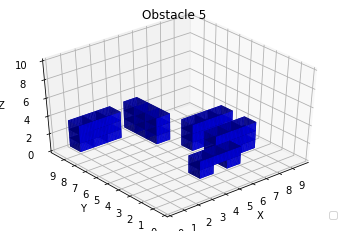

[[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 1. 1

In [5]:
generate = Obstacle_Generator(1,5)
generate.plot_env()
print(generate.env)